In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\ML\afinal\Capstone Project\Capstone Project\movie_data.csv")

In [3]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


In [9]:
df.describe()

,sentiment
count,49969.000000
mean,0.499950
std,0.500005
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


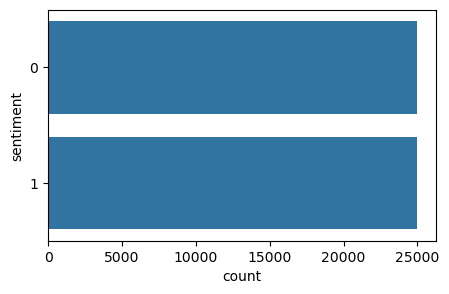

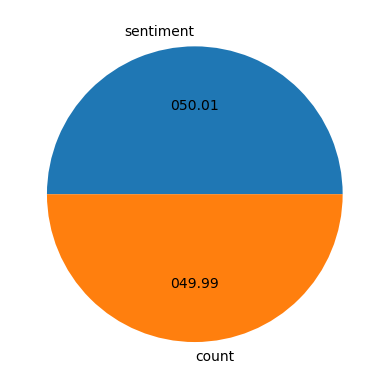

In [11]:
plt.figure(figsize = (5,3))
sns.countplot(y = df['sentiment'])
plt.show()
plt.pie(df['sentiment'].value_counts(), labels = ['sentiment','count'], autopct = '0%.2f')
plt.show()

In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [14]:
def preprocess(sentence):
    text  = re.sub(r'[^0-9a-zA-Z]', "", sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    word = [lemma.lemmatize(word,'v') for word in words]
    word = join(word)
    return word

In [15]:
for i in range (10):
    print(df['review'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

In [19]:
x = df['review']
y = df['sentiment']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
df = pd.DataFrame(x)

In [25]:
vectorizer = CountVectorizer(binary = True, max_features =1000)
binary_matrix = vectorizer.fit_transform(df['review'])

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
tokenizer = Tokenizer(num_words = 5000)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20)

In [29]:
tokenizer.fit_on_texts(x_train)

In [30]:
vocab_size = len(tokenizer.word_index)+1

In [31]:
def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    padded_sequences = pad_sequences(encoded_docs, maxlen = 128)
    return padded_sequences

In [32]:
x_train = text_encoding(x_train)
x_test = text_encoding(x_test)

In [33]:
vocab_size

111935

In [43]:
from keras import Sequential
from keras import layers

In [45]:
print('shape of x_train:', x_train.shape)
print('shape of x_test:', x_test.shape)

shape of x_train: (39975, 128)
shape of x_test: (9994, 128)


In [47]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 128, input_length = 128))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [64]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [51]:
print(type(x_train), type(y_train))


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [58]:
print("Unique labels in y_train:", np.unique(y_train))


Unique labels in y_train: [0 1]


In [68]:
np.unique(x_train)


array([   0,    1,    2, ..., 4997, 4998, 4999])

In [70]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Check and reshape y_train
y_train = np.array(y_train).reshape(-1, 1)  # Ensure it's (num_samples, 1)

# Define a simple binary classification model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))  # Ensure x_train has the right shape
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5111 - loss: 118.6492 - val_accuracy: 0.5028 - val_loss: 2.5473
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5001 - loss: 1.8650 - val_accuracy: 0.4935 - val_loss: 1.1679
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5044 - loss: 1.0519 - val_accuracy: 0.5060 - val_loss: 1.0411
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5059 - loss: 0.8921 - val_accuracy: 0.5055 - val_loss: 0.8564
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5030 - loss: 0.7967 - val_accuracy: 0.4865 - val_loss: 0.7786


In [72]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [74]:
len(y_pred)

9994

In [76]:
len(y_test)

9994

In [80]:
y_pred = [np.argmax(1) for i in y_pred]

In [82]:
y_pred[0]

0

In [86]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [88]:
accuracy_score(y_test,y_pred)

0.5007004202521513

Confusion_matrix

<Axes: >

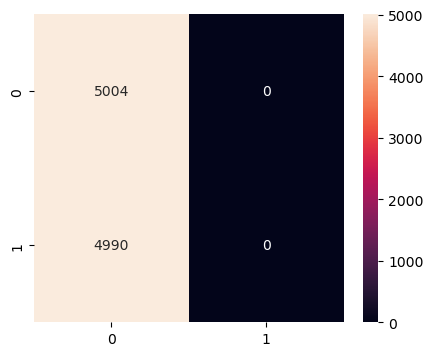

In [90]:
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot =True, fmt = 'd')

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5004
           1       0.00      0.00      0.00      4990

    accuracy                           0.50      9994
   macro avg       0.25      0.50      0.33      9994
weighted avg       0.25      0.50      0.33      9994



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
